# Preprocess data to prepare for ML predictions

In [1]:
# !pip install mlxtend

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read in RFM
df_rfm = pd.read_csv('../Resources/rfm_segmented.csv')
df_rfm

,customer_id,customer_name,MonetaryScore,RecencyScore,FrequencyScore,RFMScore,Value
0,13989,William Valdez,2,3,3,8,Med
1,32157,Craig Foley,1,5,1,7,Low
2,28452,John Greene,1,5,1,7,Low
3,31766,Brittney Maldonado,2,3,3,8,Med
4,4650,Denise Hopkins,2,5,1,8,Med
...,...,...,...,...,...,...,...
49668,47754,Veronica Kaufman,1,5,1,7,Low
49669,2507,Micheal Barrett,2,4,1,7,Low
49670,31823,Robert Medina,2,5,1,8,Med
49671,41145,Manuel Larsen,1,5,1,7,Low


In [4]:
# Read in customers
df_purchases = pd.read_csv('../Resources/digested/ecommerce_data_ML.csv')
df_purchases

,customer_id,purchase_date,is_electronics,is_home,is_clothing,is_books,product_price,quantity,total_purchased_amount,is_credit,is_crypto,is_paypal,is_cash,customer_age,returned,gender_1m_0f,churn
0,46251,2020-09-08,1,0,0,0,12,3,740,1,0,0,0,37,0.0,1,0
1,46251,2022-03-05,0,1,0,0,468,4,2739,0,0,1,0,37,0.0,1,0
2,46251,2022-05-23,0,1,0,0,288,2,3196,0,0,1,0,37,0.0,1,0
3,46251,2020-11-12,0,0,1,0,196,1,3509,0,0,1,0,37,0.0,1,0
4,13593,2020-11-27,0,1,0,0,449,1,3452,1,0,0,0,49,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10,0,0,1,0,279,2,2187,0,0,1,0,55,1.0,1,1
249996,48835,2021-11-23,0,1,0,0,27,1,3615,1,0,0,0,42,1.0,0,1
249997,21019,2020-07-02,0,1,0,0,17,5,2466,0,0,0,1,41,0.0,1,0
249998,49234,2020-12-30,0,0,0,1,398,2,3668,0,1,0,0,34,0.0,0,1


In [5]:
# Join on customer_id
df_master = pd.merge(df_purchases, df_rfm, how='left', on='customer_id')
df_master

,customer_id,purchase_date,is_electronics,is_home,is_clothing,is_books,product_price,quantity,total_purchased_amount,is_credit,...,customer_age,returned,gender_1m_0f,churn,customer_name,MonetaryScore,RecencyScore,FrequencyScore,RFMScore,Value
0,46251,2020-09-08,1,0,0,0,12,3,740,1,...,37,0.0,1,0,Christine Hernandez,2,4,2,8,Med
1,46251,2022-03-05,0,1,0,0,468,4,2739,0,...,37,0.0,1,0,Christine Hernandez,2,4,2,8,Med
2,46251,2022-05-23,0,1,0,0,288,2,3196,0,...,37,0.0,1,0,Christine Hernandez,2,4,2,8,Med
3,46251,2020-11-12,0,0,1,0,196,1,3509,0,...,37,0.0,1,0,Christine Hernandez,2,4,2,8,Med
4,13593,2020-11-27,0,1,0,0,449,1,3452,1,...,49,0.0,0,1,James Grant,3,3,3,9,Med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10,0,0,1,0,279,2,2187,0,...,55,1.0,1,1,Michelle Flores,1,5,1,7,Low
249996,48835,2021-11-23,0,1,0,0,27,1,3615,1,...,42,1.0,0,1,Jeremy Rush,1,5,1,7,Low
249997,21019,2020-07-02,0,1,0,0,17,5,2466,0,...,41,0.0,1,0,Tina Craig,1,5,1,7,Low
249998,49234,2020-12-30,0,0,0,1,398,2,3668,0,...,34,0.0,0,1,Jennifer Cooper,1,5,1,7,Low


In [6]:
# Rearrange columns
df_master = df_master[['customer_id', 'customer_name', 'customer_age', 'gender_1m_0f',
                       'Value', 'purchase_date', 'is_electronics', 'is_home',
                       'is_clothing', 'is_books', 'product_price', 'quantity',
                       'total_purchased_amount', 'is_credit', 'is_crypto', 'is_paypal',
                       'is_cash', 'returned', 'churn']]

# Drop returned for NA values
df_master.drop('returned', axis=1, inplace=True)

In [7]:
import datetime as dt

# Preview master
df_master['purchase_date'] = pd.to_datetime(df_master['purchase_date'])
df_master['purchase_date'] = (df_master['purchase_date'] - dt.datetime(1970,1,1)).dt.total_seconds()
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             250000 non-null  int64  
 1   customer_name           250000 non-null  object 
 2   customer_age            250000 non-null  int64  
 3   gender_1m_0f            250000 non-null  int64  
 4   Value                   250000 non-null  object 
 5   purchase_date           250000 non-null  float64
 6   is_electronics          250000 non-null  int64  
 7   is_home                 250000 non-null  int64  
 8   is_clothing             250000 non-null  int64  
 9   is_books                250000 non-null  int64  
 10  product_price           250000 non-null  int64  
 11  quantity                250000 non-null  int64  
 12  total_purchased_amount  250000 non-null  int64  
 13  is_credit               250000 non-null  int64  
 14  is_crypto           

In [8]:
# Group by to agg by earliest date for each
df_first_purchases = df_master.groupby('customer_id').agg({'purchase_date': 'min'})
df_first_purchases

,purchase_date
customer_id,
1,1.689725e+09
2,1.614902e+09
3,1.601165e+09
4,1.602202e+09
5,1.580170e+09
...,...
49996,1.598659e+09
49997,1.592352e+09
49998,1.620086e+09


In [9]:
# Innerjoin
df_first_purchases = pd.merge(df_master, df_first_purchases, how='inner', on=['customer_id', 'purchase_date'])
df_first_purchases

,customer_id,customer_name,customer_age,gender_1m_0f,Value,purchase_date,is_electronics,is_home,is_clothing,is_books,product_price,quantity,total_purchased_amount,is_credit,is_crypto,is_paypal,is_cash,churn
0,46251,Christine Hernandez,37,1,Med,1.599523e+09,1,0,0,0,12,3,740,1,0,0,0,0
1,13593,James Grant,49,0,Med,1.588637e+09,0,0,1,0,182,2,3363,0,0,1,0,1
2,28805,Jose Collier,19,1,Med,1.578355e+09,0,0,0,1,103,4,731,0,0,0,1,0
3,28961,James Stein,55,1,Med,1.578874e+09,0,0,0,1,153,5,698,1,0,0,0,0
4,12163,Sonia Moreno,67,1,Med,1.586218e+09,0,0,0,1,100,5,1273,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49761,33308,Michelle Flores,55,1,Low,1.691626e+09,0,0,1,0,279,2,2187,0,0,1,0,1
49762,48835,Jeremy Rush,42,0,Low,1.637626e+09,0,1,0,0,27,1,3615,1,0,0,0,1
49763,21019,Tina Craig,41,1,Low,1.593648e+09,0,1,0,0,17,5,2466,0,0,0,1,0
49764,49234,Jennifer Cooper,34,0,Low,1.609286e+09,0,0,0,1,398,2,3668,0,1,0,0,1


In [10]:
# Encode prediction variables
value_dict = {
    'High': 2,
    'Med': 1,
    'Low': 0
}

value_encoded = np.array(df_first_purchases['Value'].map(value_dict))

# Extract prediction variables
low_value = np.where(df_first_purchases['Value'] == 'Low', 1, 0)
high_value = np.where(df_first_purchases['Value'] == 'High', 1, 0)
retained_value = np.where(df_first_purchases['churn'] == 0, 1, 0)
churned_value = np.where(df_first_purchases['churn'] == 1, 1, 0)

# Check if values were extracted correctly
low_val_check = np.array_equal(low_value, (df_first_purchases['Value'] == 'Low'))
high_val_check = np.array_equal(high_value, (df_first_purchases['Value'] == 'High'))
churn_val_check = np.array_equal(churned_value, (df_first_purchases['churn'] == 1))
retained_val_check = np.array_equal(retained_value, (df_first_purchases['churn'] == 0))
test_val_check = np.array_equal(churned_value, (df_first_purchases['churn'] == 0))

print(df_first_purchases['Value'].value_counts())
print(np.unique(value_encoded, return_counts=True))
print(churn_val_check, retained_val_check, test_val_check)
# And drop from dataframe
df_first_purchases.drop(['Value', 'churn'], axis=1, inplace=True)

Value
Med     19216
High    18287
Low     12263
Name: count, dtype: int64
(array([0, 1, 2]), array([12263, 19216, 18287]))
True True False


In [11]:
# Drop other columns that would not contribute:
df_first_purchases.drop(['customer_id', 'customer_name'], axis=1, inplace=True)

In [12]:
# Preview:
df_first_purchases

,customer_age,gender_1m_0f,purchase_date,is_electronics,is_home,is_clothing,is_books,product_price,quantity,total_purchased_amount,is_credit,is_crypto,is_paypal,is_cash
0,37,1,1.599523e+09,1,0,0,0,12,3,740,1,0,0,0
1,49,0,1.588637e+09,0,0,1,0,182,2,3363,0,0,1,0
2,19,1,1.578355e+09,0,0,0,1,103,4,731,0,0,0,1
3,55,1,1.578874e+09,0,0,0,1,153,5,698,1,0,0,0
4,67,1,1.586218e+09,0,0,0,1,100,5,1273,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49761,55,1,1.691626e+09,0,0,1,0,279,2,2187,0,0,1,0
49762,42,0,1.637626e+09,0,1,0,0,27,1,3615,1,0,0,0
49763,41,1,1.593648e+09,0,1,0,0,17,5,2466,0,0,0,1
49764,34,0,1.609286e+09,0,0,0,1,398,2,3668,0,1,0,0


# Predictive Modeling

Here, we wanted to see if we can create a ML model that predicts the following:

* **Customer Value**: See if we can predict customer value from RFM analysis solely based on their first purchase. Specifically, low value customers
* **Customer Churn**: See if we can predict if a customer trends to churn based on their first purchase behavior.

The reason: Predicting these parameters allows us to get a better understanding of what features impacts churn and value the most. From here we can leverage these features to engage with the customers to improve customer loyalty and retention, leading to reduced costs, improved quarterly revenue and maybe even improved business operations. 

The how: RandomForestClassifier


(array([37503.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12263.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

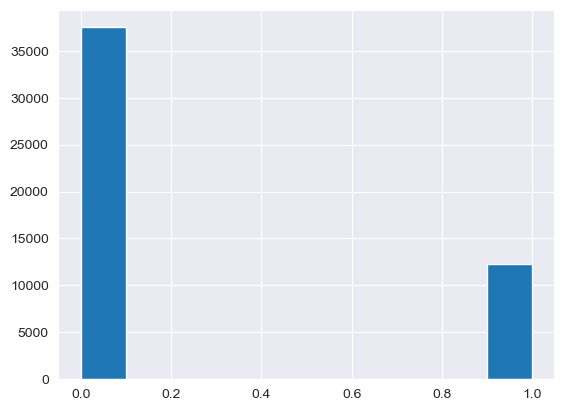

In [13]:
# Check class balance of low_value
plt.hist(low_value)

In [14]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.12.0 requires tensorflow-metal<2.0.0,>=1.1.0; sys_platform == "darwin" and platform_machine == "arm64", which is not installed.
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [15]:
# Start with predicting customer segment from first purchase

# Train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_first_purchases, low_value, random_state=42)

from imblearn.over_sampling import SMOTE

smp = SMOTE(random_state=42, k_neighbors=5)
X_train_resmp, y_train_resmp = smp.fit_resample(X_train, y_train)

In [18]:
# # Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# estimator = RandomForestClassifier(random_state=42)
# parameters = {
#     'n_estimators': [100, 250, 500],
#     'criterion': ['gini'],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10]
# }
# 
# clf = GridSearchCV(param_grid=parameters, estimator=estimator, cv=5, scoring='accuracy')
# clf.fit(X_train, y_train)
# 
# # Best parameter set
# print("Best parameters:", clf.best_params_)
# print("Best score:", clf.best_score_)
# print("Best model", clf.best_estimator_)

In [19]:
clf = RandomForestClassifier(random_state=42, criterion='gini', max_depth= None, min_samples_split=5, n_estimators=500)
clf.fit(X_train_resmp, y_train_resmp)
clf_segment_score = clf.score(X_test, y_test)
print(clf_segment_score)
clf_test_predictions = clf.predict(X_test)

0.7704549107860472


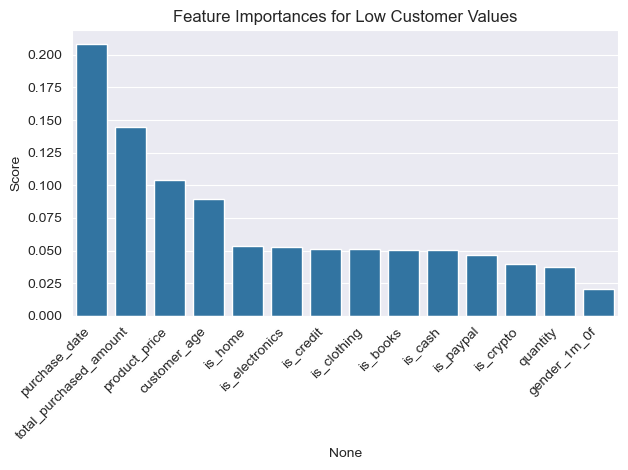

<Figure size 640x480 with 0 Axes>

In [20]:
features = clf.feature_importances_
feature_importances = pd.DataFrame(features, index=df_first_purchases.columns)
feature_importances = feature_importances.sort_values(by=0, ascending=False)
feature_importances.columns = ['Score']

sns.barplot(feature_importances, x=feature_importances.index, y='Score')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances for Low Customer Values')
plt.tight_layout()
plt.savefig("../Images/rfm_feature_importances.png", dpi=300)
plt.show()
plt.clf()

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9380
           1       0.57      0.28      0.38      3062

    accuracy                           0.77     12442
   macro avg       0.68      0.61      0.62     12442
weighted avg       0.74      0.77      0.74     12442

[[8723  657]
 [2199  863]]


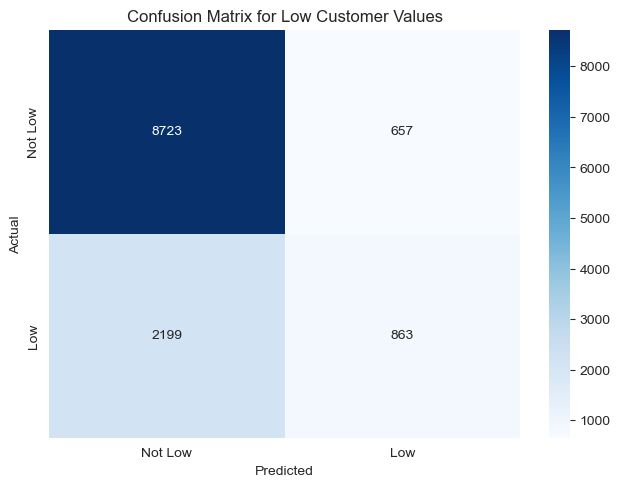

<Figure size 640x480 with 0 Axes>

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, clf_test_predictions))

clf_conf_matrix = confusion_matrix(y_test, clf_test_predictions)
print(clf_conf_matrix)
clf_conf_matrix = pd.DataFrame(clf_conf_matrix, index=['Not Low', 'Low'], columns=['Not Low', 'Low'])
sns.heatmap(clf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Low Customer Values')
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("../Images/rfm_con.png", dpi=300)
plt.show()
plt.clf()

# Conf Matrix results
False negatives are problematic because they misclassify a large segment low-value customers as mid/high. As an example, out of the 18754 first time customers, if we offer a 15% discount in this model to those with predicted low value, given the median total of each cart is about 250, that would result in up to $82,000 dollars lost in revenue, not including marketing and administrative resources. More work needs to be done to improve this predictive model.

# Perform Sequential floating forward selection
Starts at 0 features and iteratively selects and adds features to see if the prediction score improves

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(clf,
           k_features=5, 
           forward=False,
           floating=True,
           scoring='accuracy',
           cv=2)
# Fit SFS to our features X and outcome y   
sfs.fit(X_train, y_train)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(min_samples_split=5,
                                                           n_estimators=500,
                                                           random_state=42),
                          floating=True, forward=False, k_features=(5, 5),
                          scoring='accuracy')

In [23]:
sfs.subsets_

{14: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
  'cv_scores': array([0.77869467, 0.77885543]),
  'avg_score': 0.7787750509055835},
 13: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
  'cv_scores': array([0.77981995, 0.7796592 ]),
  'avg_score': 0.7797395777515808},
 12: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13),
  'cv_scores': array([0.77890901, 0.7803558 ]),
  'avg_score': 0.7796324081020255},
 11: {'feature_idx': (0, 1, 2, 4, 6, 7, 8, 9, 11, 12, 13),
  'cv_scores': array([0.77928411, 0.77939128]),
  'avg_score': 0.7793376915657486},
 10: {'feature_idx': (0, 1, 2, 6, 7, 8, 9, 11, 12, 13),
  'cv_scores': array([0.77939128, 0.77987354]),
  'avg_score': 0.7796324081020255},
 9: {'feature_idx': (0, 1, 2, 6, 7, 8, 9, 12, 13),
  'cv_scores': array([0.77815883, 0.77949845]),
  'avg_score': 0.7788286357303611},
 8: {'feature_idx': (0, 1, 2, 4, 6, 7, 8, 9),
  'cv_scores': array([0.77890901, 0.77987354]),
  'avg_score': 0.7793912763905262},
 7:

# Predictive Modeling for Churn 

(array([39806.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9960.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

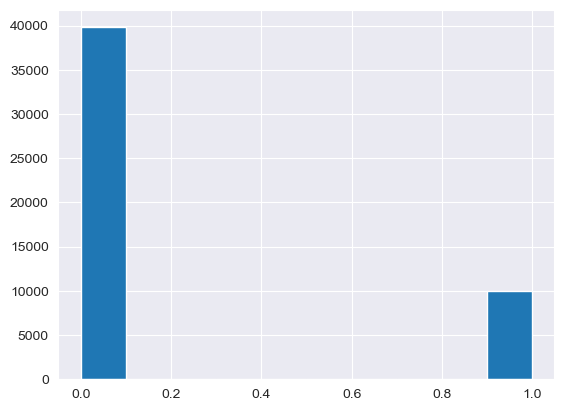

In [24]:
# Check class imbalance
plt.hist(churned_value)

In [25]:
# Address class imbalance
smp = SMOTE(random_state=42, k_neighbors=5)
X_train_resmp, y_train_resmp = smp.fit_resample(df_first_purchases, churned_value)

0.8495213869736931
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      7419
           1       0.97      0.72      0.83      7520

    accuracy                           0.85     14939
   macro avg       0.87      0.85      0.85     14939
weighted avg       0.87      0.85      0.85     14939


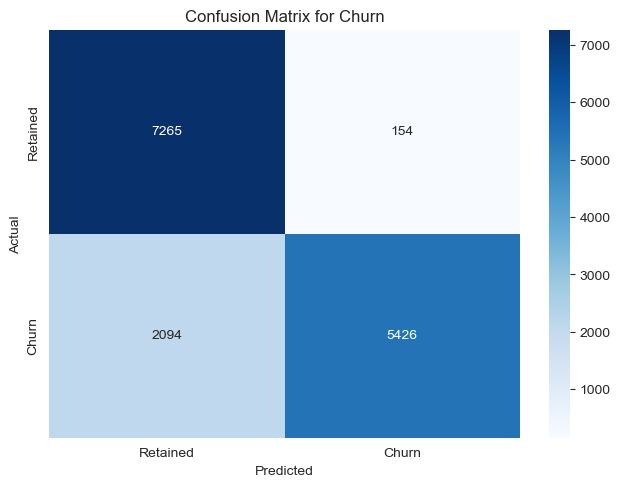

<Figure size 640x480 with 0 Axes>

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train_resmp, y_train_resmp, random_state=42)

smp = SMOTE(random_state=42, k_neighbors=5)
X_train_resmp, y_train_resmp = smp.fit_resample(X_train, y_train)

# Train with RandomForest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resmp, y_train_resmp)
clf_segment_score = clf.score(X_test, y_test)
print(clf_segment_score)
clf_test_predictions = clf.predict(X_test)

# Inerpret results
print(classification_report(y_test, clf_test_predictions))

clf_conf_matrix = confusion_matrix(y_test, clf_test_predictions)
clf_conf_matrix = pd.DataFrame(clf_conf_matrix, index=['Retained', 'Churn'], columns=['Retained', 'Churn'])
sns.heatmap(clf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Churn')
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("../Images/churn_conf.png", dpi=300)
plt.show()
plt.clf()

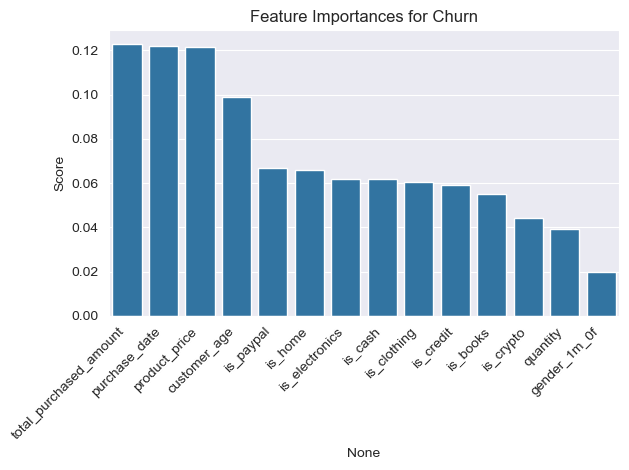

<Figure size 640x480 with 0 Axes>

In [27]:
# Extract components
features = clf.feature_importances_
feature_importances = pd.DataFrame(features, index=df_first_purchases.columns)
feature_importances = feature_importances.sort_values(by=0, ascending=False)
feature_importances.columns = ['Score']

sns.barplot(feature_importances, x=feature_importances.index, y='Score')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances for Churn')
plt.tight_layout()
plt.savefig("../Images/churn_feature_importances.png", dpi=300)
plt.show()
plt.clf()